In [135]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
def file_opener(path, rtype):
    with open(path, rtype) as f:
        csv_arr = f.readlines()
        for row in range(1, len(csv_arr)):
            csv_arr[row] = csv_arr[row].split(',')
            csv_arr[row][0], csv_arr[row][1] = float(csv_arr[row][0]), float(csv_arr[row][1][:-1])
        csv_arr = csv_arr[1:]
    return csv_arr

In [3]:
csv_arr = file_opener("business_proj.csv", "r")
csv_valid = file_opener("task_test.csv", "r")
csv_arr = np.array(csv_arr, dtype=float)
x_train = csv_arr[:,0].reshape(csv_arr.shape[0], 1)
y_train = csv_arr[:,1]

In [4]:
zero_count, zero_summ = 0, 0
one_count, one_summ = 0, 0
for x in range(len(csv_arr)):
    if csv_arr[x][1] == 0.0:
        zero_count += 1
        zero_summ += csv_arr[x][0]
    else:
        one_count += 1
        one_summ += csv_arr[x][0]
if zero_count:
    zero_mean = zero_summ/zero_count
else: zero_mean = 0
if one_count:
    one_mean = one_summ/one_count
else: one_mean = 0

In [5]:
print(zero_mean, '\n', one_mean)

-0.01208069437659561 
 2.0437930561697337


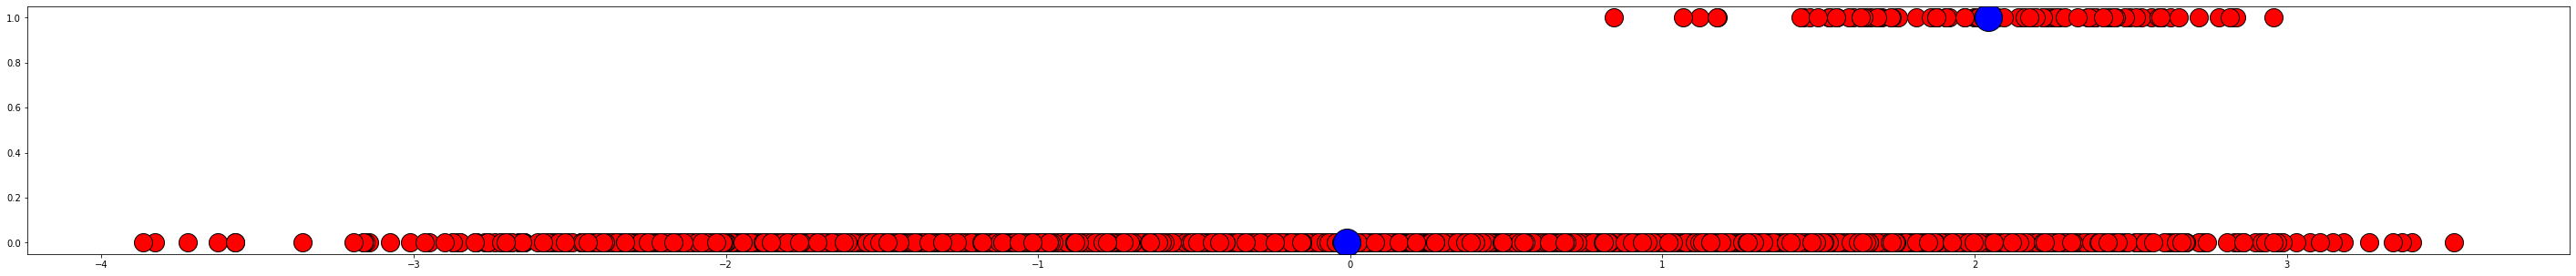

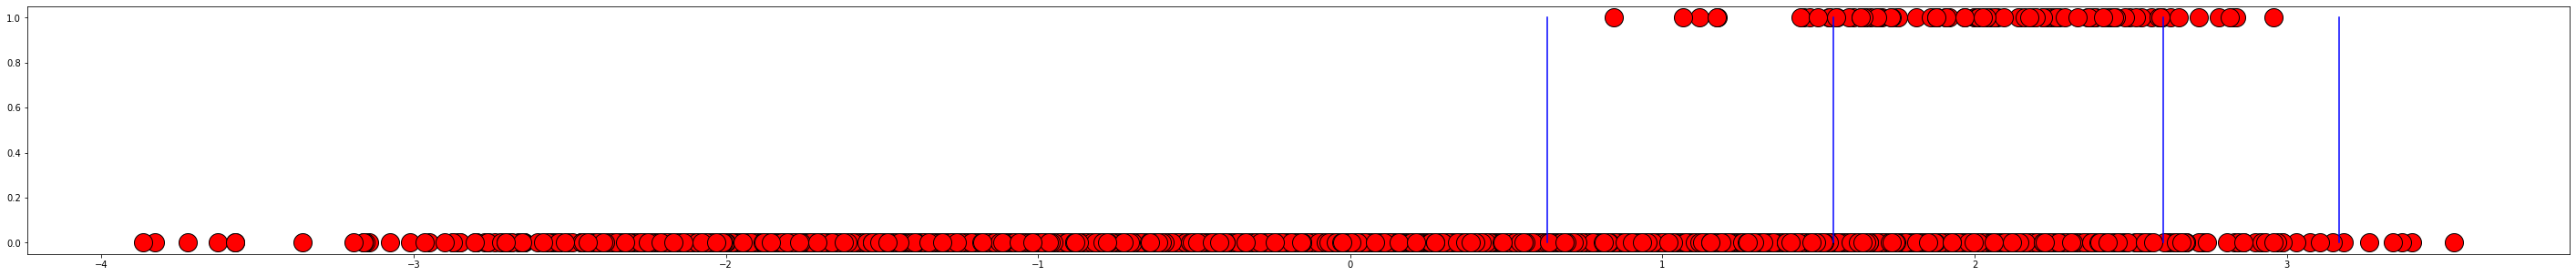

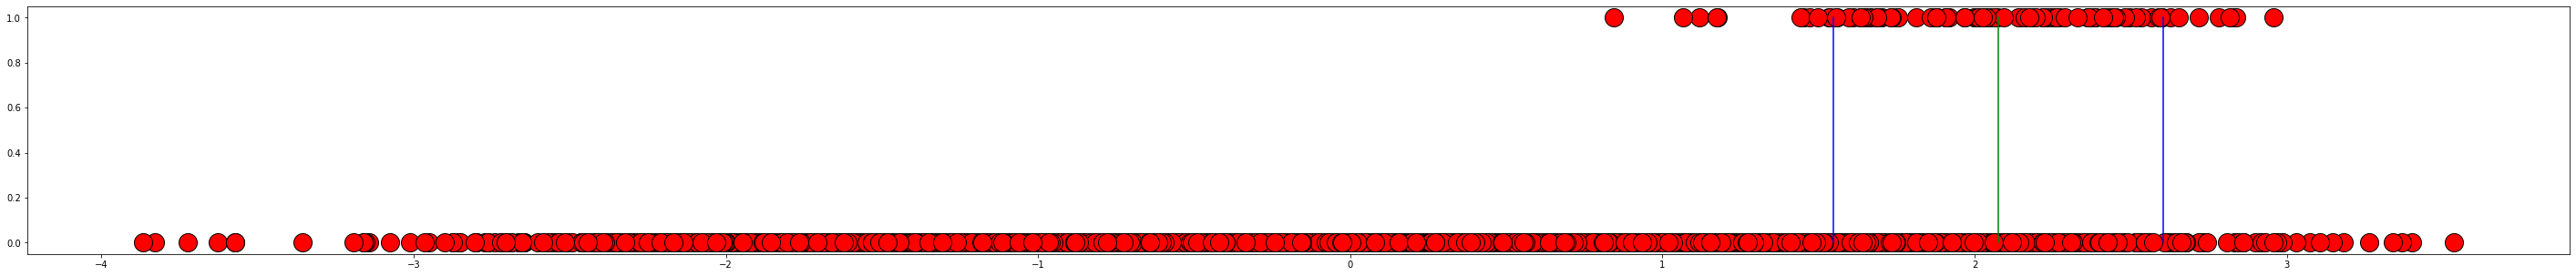

In [6]:
plt.figure(figsize=(50,5))
#plt.scatter(x_train, y_train, c=['r']*len(x_train))
plt.plot(x_train, y_train, 'ro', ms=20, mec='k')
plt.plot([one_mean], [1], 'bo', ms=30, mec='k')
plt.plot([zero_mean], [0], 'bo', ms=30, mec='k')
ones = csv_arr[csv_arr[:, 1] == 1]
zeros = csv_arr[csv_arr[:, 1] == 0]
left_one_bound = min(ones[:,0])-(max(ones[:,0]) - min(ones[:,0]))/10
right_one_bound = max(ones[:,0])+(max(ones[:,0]) - min(ones[:,0]))/10

left_one_bound_80 = min(ones[:,0])+(max(ones[:,0]) - min(ones[:,0]))/3
right_one_bound_80 = max(ones[:,0])-(max(ones[:,0]) - min(ones[:,0]))/6

plt.figure(figsize=(50,5))
plt.plot(x_train, y_train, 'ro', ms=20, mec='k')
plt.plot([left_one_bound, left_one_bound], [1, 0], 'b', ms=30, mec='k')
plt.plot([right_one_bound, right_one_bound], [1, 0], 'b', ms=30, mec='k')
plt.plot([left_one_bound_80, left_one_bound_80], [1, 0], 'b', ms=30, mec='k')
plt.plot([right_one_bound_80, right_one_bound_80], [1, 0], 'b', ms=30, mec='k')

plt.figure(figsize=(50,5))
one_center = (left_one_bound_80 + right_one_bound_80)/2
one_bound = (right_one_bound_80 - left_one_bound_80) / 2
plt.plot(x_train, y_train, 'ro', ms=20, mec='k')
plt.plot([one_center-one_bound, one_center-one_bound], [1, 0], 'b', ms=30, mec='k')
plt.plot([one_center+one_bound, one_center+one_bound], [1, 0], 'b', ms=30, mec='k')
plt.plot([one_center, one_center], [1, 0], 'g', ms=30, mec='k')


In [7]:
def errors(x, y, line) -> float:
    c_0_left, c_0_right = len(x[(x<line)&(y==0)]), len(x[(x>=line)&(y==0)])
    c_1_left, c_1_right = len(x[(x<line)&(y==1)]), len(x[(x>=line)&(y==1)])
    err1 = (c_1_left+c_0_right)
    err2 = (c_0_left+c_1_right)
    return min(err1, err2)
def Entropy(zeros, ones):
    _all = zeros+ones
    if _all == 0.0:
        return 0
    p = zeros/_all
    if zeros == 0.0:
        return (1-p)*np.log2(1/(1-p))
    if ones == 0.0:
        return p*np.log2(1/p)
    else:
        return p*np.log2(1/p)+(1-p)*np.log2(1/(1-p))
def Ilyusha(zeros, ones):
    _all = zeros+ones
    if _all == 0.0:
        return 0
    p = zeros/_all
    return -1*(p**2*np.log(p)+(1-p)**2*np.log(1-p))
def Gini(zeros, ones):
    _all = zeros+ones
    if _all == 0.0:
        return 0
    p = zeros/_all
    return 2*p*(1-p)
        
def InfoGain(x, y, line, method='Entropy') -> float:
    c_0_left, c_0_right = len(x[(x<line)&(y==0)]), len(x[(x>=line)&(y==0)])
    c_1_left, c_1_right = len(x[(x<line)&(y==1)]), len(x[(x>=line)&(y==1)])
    zeros = c_0_left+c_0_right
    ones = c_1_left + c_1_right
    alpha = (c_0_left+c_1_left)/(zeros+ones)
    if method == 'Entropy':
        func = Entropy
    elif method == 'Ilyusha':
        func = Ilyusha
    else:
        func = Gini
        # 2*3/5*(1-3/5)-(3/5*4/3*(1-2/3)+2/5*1*1/2)
        # 2*2/5(1-2/5)-0
    _all = func(zeros,ones)
    _l = func(c_0_left, c_1_left)
    _r = func(c_0_right, c_1_right)
    return _all-(alpha*_l+(1-alpha)*_r)
        
        

    
    
#7-2
#7-5

#7-5
    
arr1 = np.array([1,   1,  0,  0,  1, 1, 0])
arr2 = np.array([-5, -4, -3, -2, -1, 0, 1])

assert errors(arr2, arr1, -3)== 2

arr1 = np.array([0,   0,  0,  0,  1, 1, 0])
arr2 = np.array([-5, -4, -3, -2, -1, 0, 1])

assert errors(arr2, arr1, -5)== 2

In [8]:
def find_bound(x_train, y_train, count, method='Entropy') -> tuple:
    min_line, min_line_error = None, 0
    it = (max(x_train) - min(x_train))/count
    for i in range(count):
        line = min(x_train)+it*i
        err = InfoGain(x_train, y_train, line, method)
        if err > min_line_error:
            min_line = line
            min_line_error = err
    return min_line, min_line_error
    

In [9]:
print(x_train.shape, csv_arr.shape)

(10000, 1) (10000, 2)


/Users/bolevard/.pyenv/versions/3.6.15/envs/jupvenv/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
/Users/bolevard/.pyenv/versions/3.6.15/envs/jupvenv/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


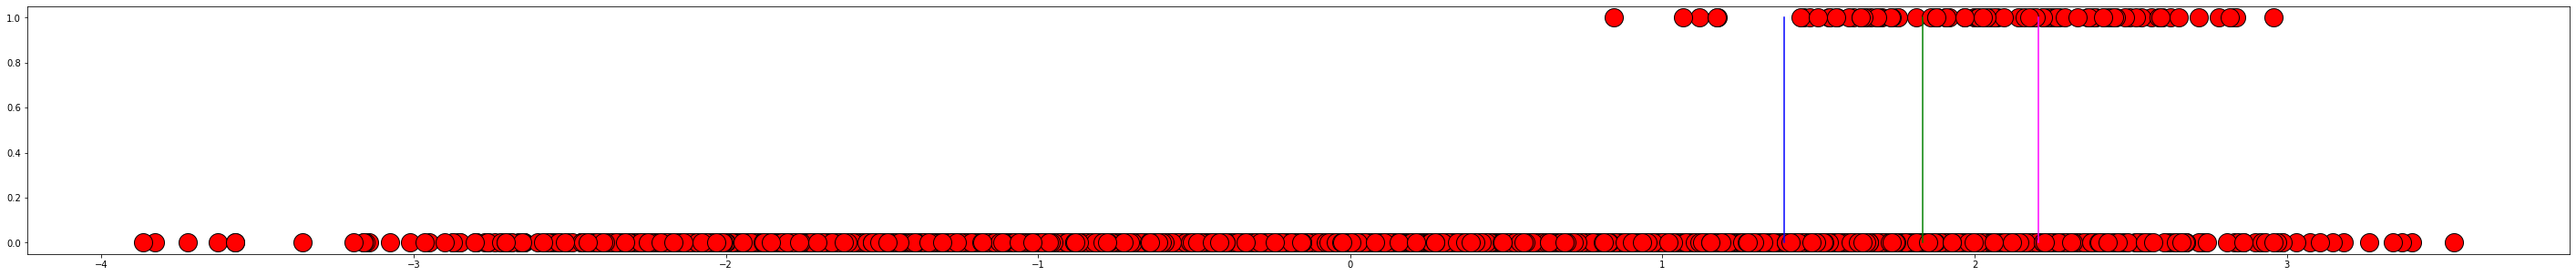

In [10]:
plt.figure(figsize=(50,5))
bnd1 = find_bound(x_train[:,0], y_train, 100)
plt.plot(x_train, y_train, 'ro', ms=20, mec='k')
plt.plot([bnd1[0], bnd1[0]], [1, 0], 'b', ms=30, mec='k')

bnd2 = find_bound(x_train[:,0], y_train, 100, 'Gini')
plt.plot([bnd2[0], bnd2[0]], [1, 0], 'g', ms=30, mec='k')

bnd3 = find_bound(x_train[:,0], y_train, 100, 'Ilyusha')
plt.plot([bnd3[0], bnd3[0]], [1, 0], 'magenta', ms=30, mec='k')

In [11]:
print(bnd2,'\n', bnd3)


(1.8331136261083496, 0.0023524177145788014) 
 (2.2032770419387258, 0.00022775703148720204)


In [127]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10, class_weight = 'balanced')

In [128]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, min_samples_leaf=10)

In [129]:
model.predict([[0]])[0]

0.0

In [130]:
data_x = [[x/100] for x in range(-400, 380)]

In [131]:
y_test_sk = model.predict(data_x)

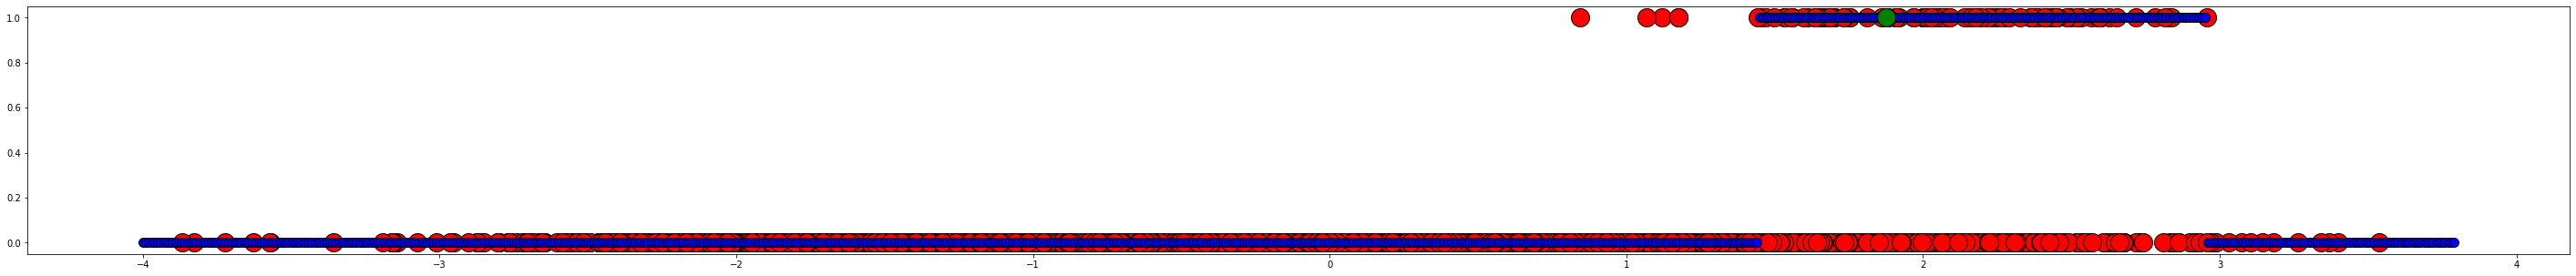

In [134]:
plt.figure(figsize=(50,5))
plt.plot(x_train, y_train, 'ro', ms=20, mec='k')
plt.plot(data_x, y_test_sk, 'bo', ms=10, mec='k')
plt.plot([1.875], model.predict([[1.875]]), 'go', ms=20, mec='k')

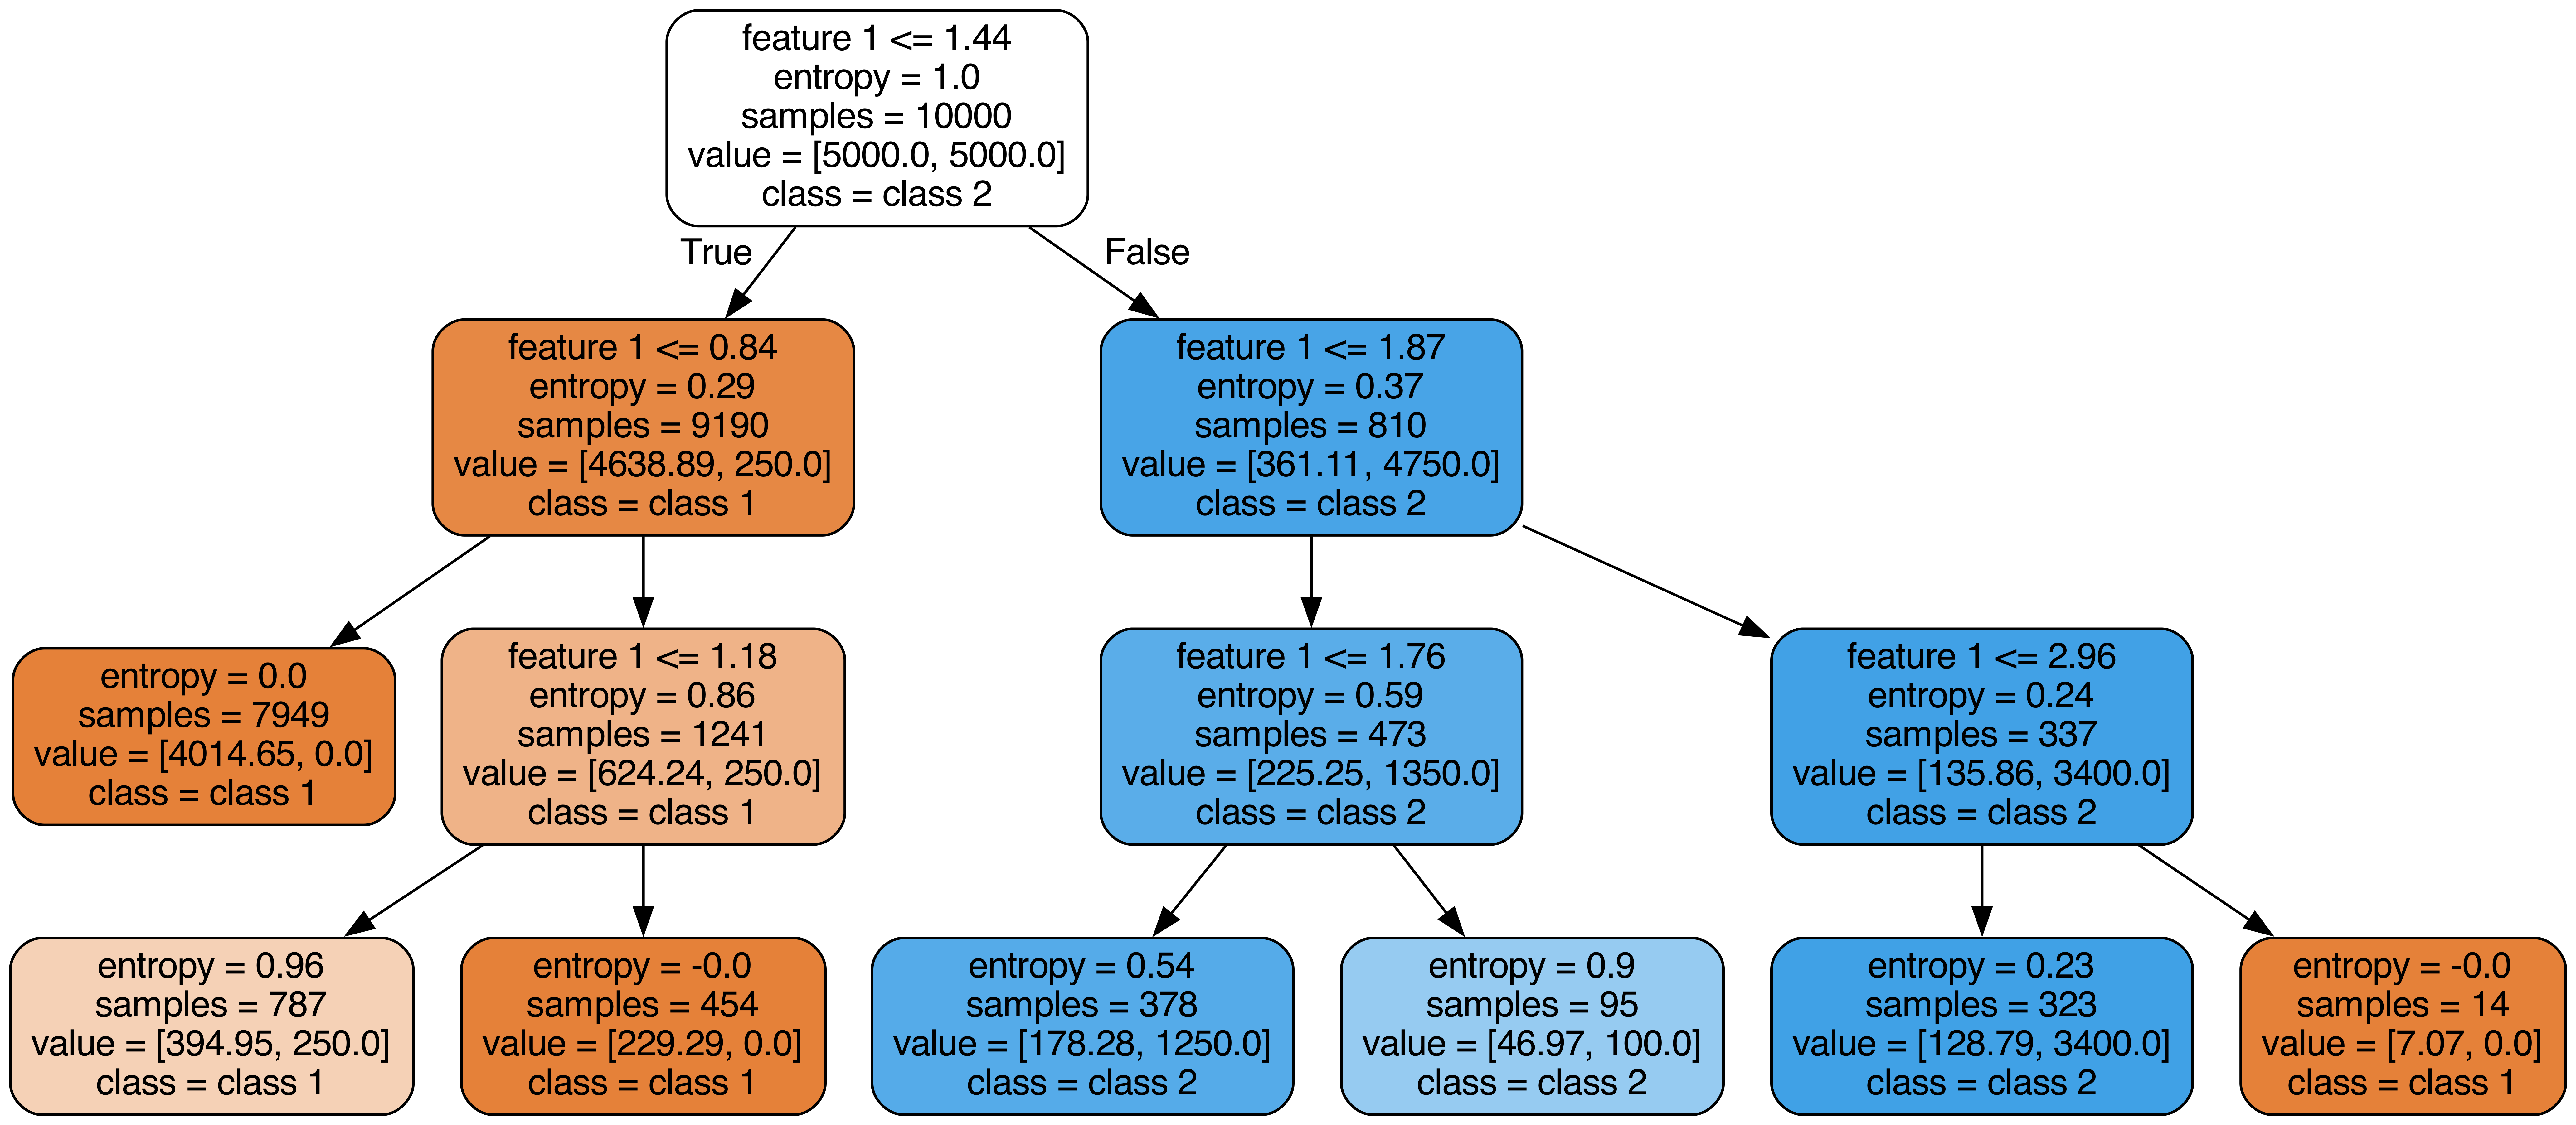

In [133]:
from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(model, out_file='tree.dot', 
                feature_names = ['feature 1'],
                class_names = ['class 1', 'class 2'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [137]:
model_forest = RandomForestClassifier(
    criterion='entropy', 
    max_depth=3,
    min_samples_leaf=10, 
    class_weight = 'balanced', 
    n_estimators = 3
)

In [138]:
model_forest.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, min_samples_leaf=10, n_estimators=3)

In [139]:
y_forest = model_forest.predict(data_x)

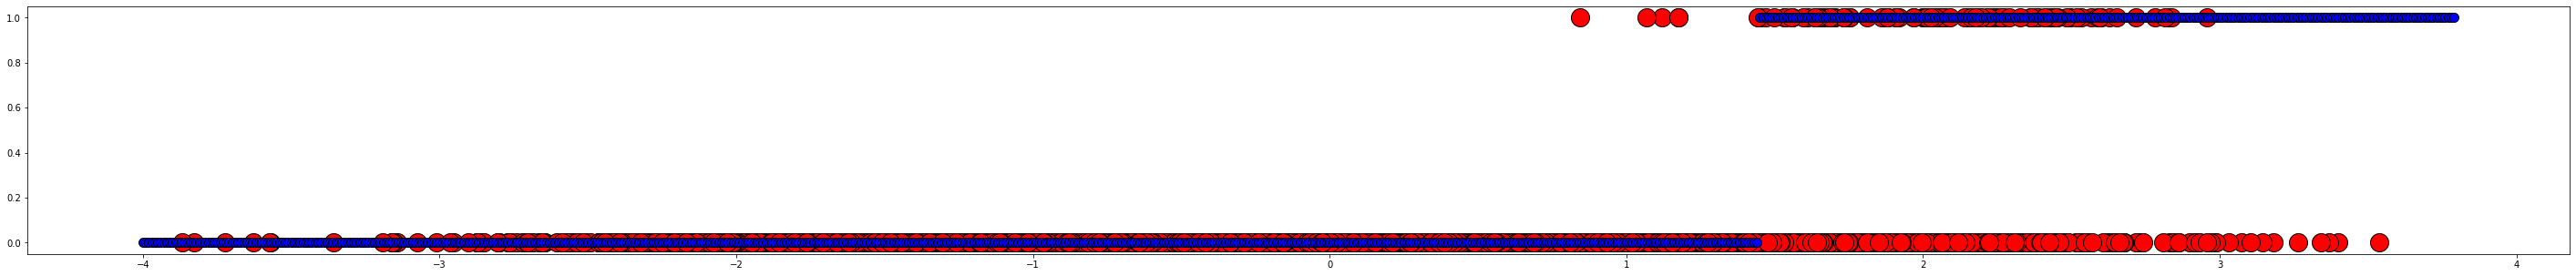

In [140]:
plt.figure(figsize=(50,5))
plt.plot(x_train, y_train, 'ro', ms=20, mec='k')
plt.plot(data_x, y_forest, 'bo', ms=10, mec='k')
# plt.plot([1.875], model.predict([[1.875]]), 'go', ms=20, mec='k')

In [145]:
from subprocess import call
from IPython.display import Image

In [149]:
def tree_image(model):
    export_graphviz(model, out_file='tree.dot', 
                feature_names = ['feature 1'],
                class_names = ['class 1', 'class 2'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

    # Convert to png using system command (requires Graphviz)

    call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

    # Display in jupyter notebook

    return Image(filename = 'tree.png')

In [144]:
model_forest.estimators_

[DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='auto',
                        min_samples_leaf=10, random_state=517157584),
 DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='auto',
                        min_samples_leaf=10, random_state=1362711624),
 DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='auto',
                        min_samples_leaf=10, random_state=1494680659)]

In [ ]:
tree_image(model_forest.estimators_[0])